# Using data analysis to predict Student Success at school

## Business Understanding

### Research question

Which educational, environmental and individual factors impact student’s
outcomes the most?

### Project Description

We want to show which factors are the most important in the success of a student. We have data
about the involvement of students in their studies but also the involvement of their family. Other
information about the habits and resources of students are also important to sketch their daily
environment.

### Expected results

We expect to see that the factors which contribute the most to the academic success of a student
are the one related to the lifestyle of the person. More specifically, we think that :
- The number of hours studied will impact the result because we expect that the more you study a
subject, the more you can learn and then succeed during the exam.
- Sleep hours is an important attribute because it gives us information on the physical condition of
the student.
- The motivation level should show how much the student wants to succeed and thus makes bigger
efforts to complete a task.

## Data Cleaning

### Importing required libraries 

In this section, we import the necessary libraries

In [107]:
#pip install seaborn

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

from scipy.stats import chi2_contingency

### Loading the Dataset 

We use 'pandas' library to load the dataset

In [109]:
data = pd.read_csv('StudentPerformanceFactors.csv')

### Previewing the Dataset



We use `data.head()` to preview the first 15 rows of the dataset and get an overview of the data structure


In [110]:
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [111]:
data.info() #details on the student dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Checking for missing values

In [112]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Calculating missing data percentages
We calculate the percentage of missing values for each column to better understand the extent of missing data.


In [113]:
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_values_percentage.apply(lambda x: f"{x:.2f}%"))

Hours_Studied                 0.00%
Attendance                    0.00%
Parental_Involvement          0.00%
Access_to_Resources           0.00%
Extracurricular_Activities    0.00%
Sleep_Hours                   0.00%
Previous_Scores               0.00%
Motivation_Level              0.00%
Internet_Access               0.00%
Tutoring_Sessions             0.00%
Family_Income                 0.00%
Teacher_Quality               1.18%
School_Type                   0.00%
Peer_Influence                0.00%
Physical_Activity             0.00%
Learning_Disabilities         0.00%
Parental_Education_Level      1.36%
Distance_from_Home            1.01%
Gender                        0.00%
Exam_Score                    0.00%
dtype: object


### Dropping missing values
Since the percentage of missing values is relatively small (around 1-2%), we decide to drop the rows with missing data using `data.dropna().


In [114]:
data.dropna(inplace=True)

After dropping the rows, we check again to ensure there are no missing values left in the dataset

In [115]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


### Encoding categorical data

First, we transform the Objects Values into Categorical Values

In [116]:
categorical_columns = data.select_dtypes(include = ['object']).columns

# transform objects into categorical values
for col in categorical_columns:
    data[col] = data[col].astype('category')

Then, we verify that the data types has been correctly changed

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

## Exploratory Data Analysis (EDA)

Let's plot all variables with the exam_score to see some first relationships between them.

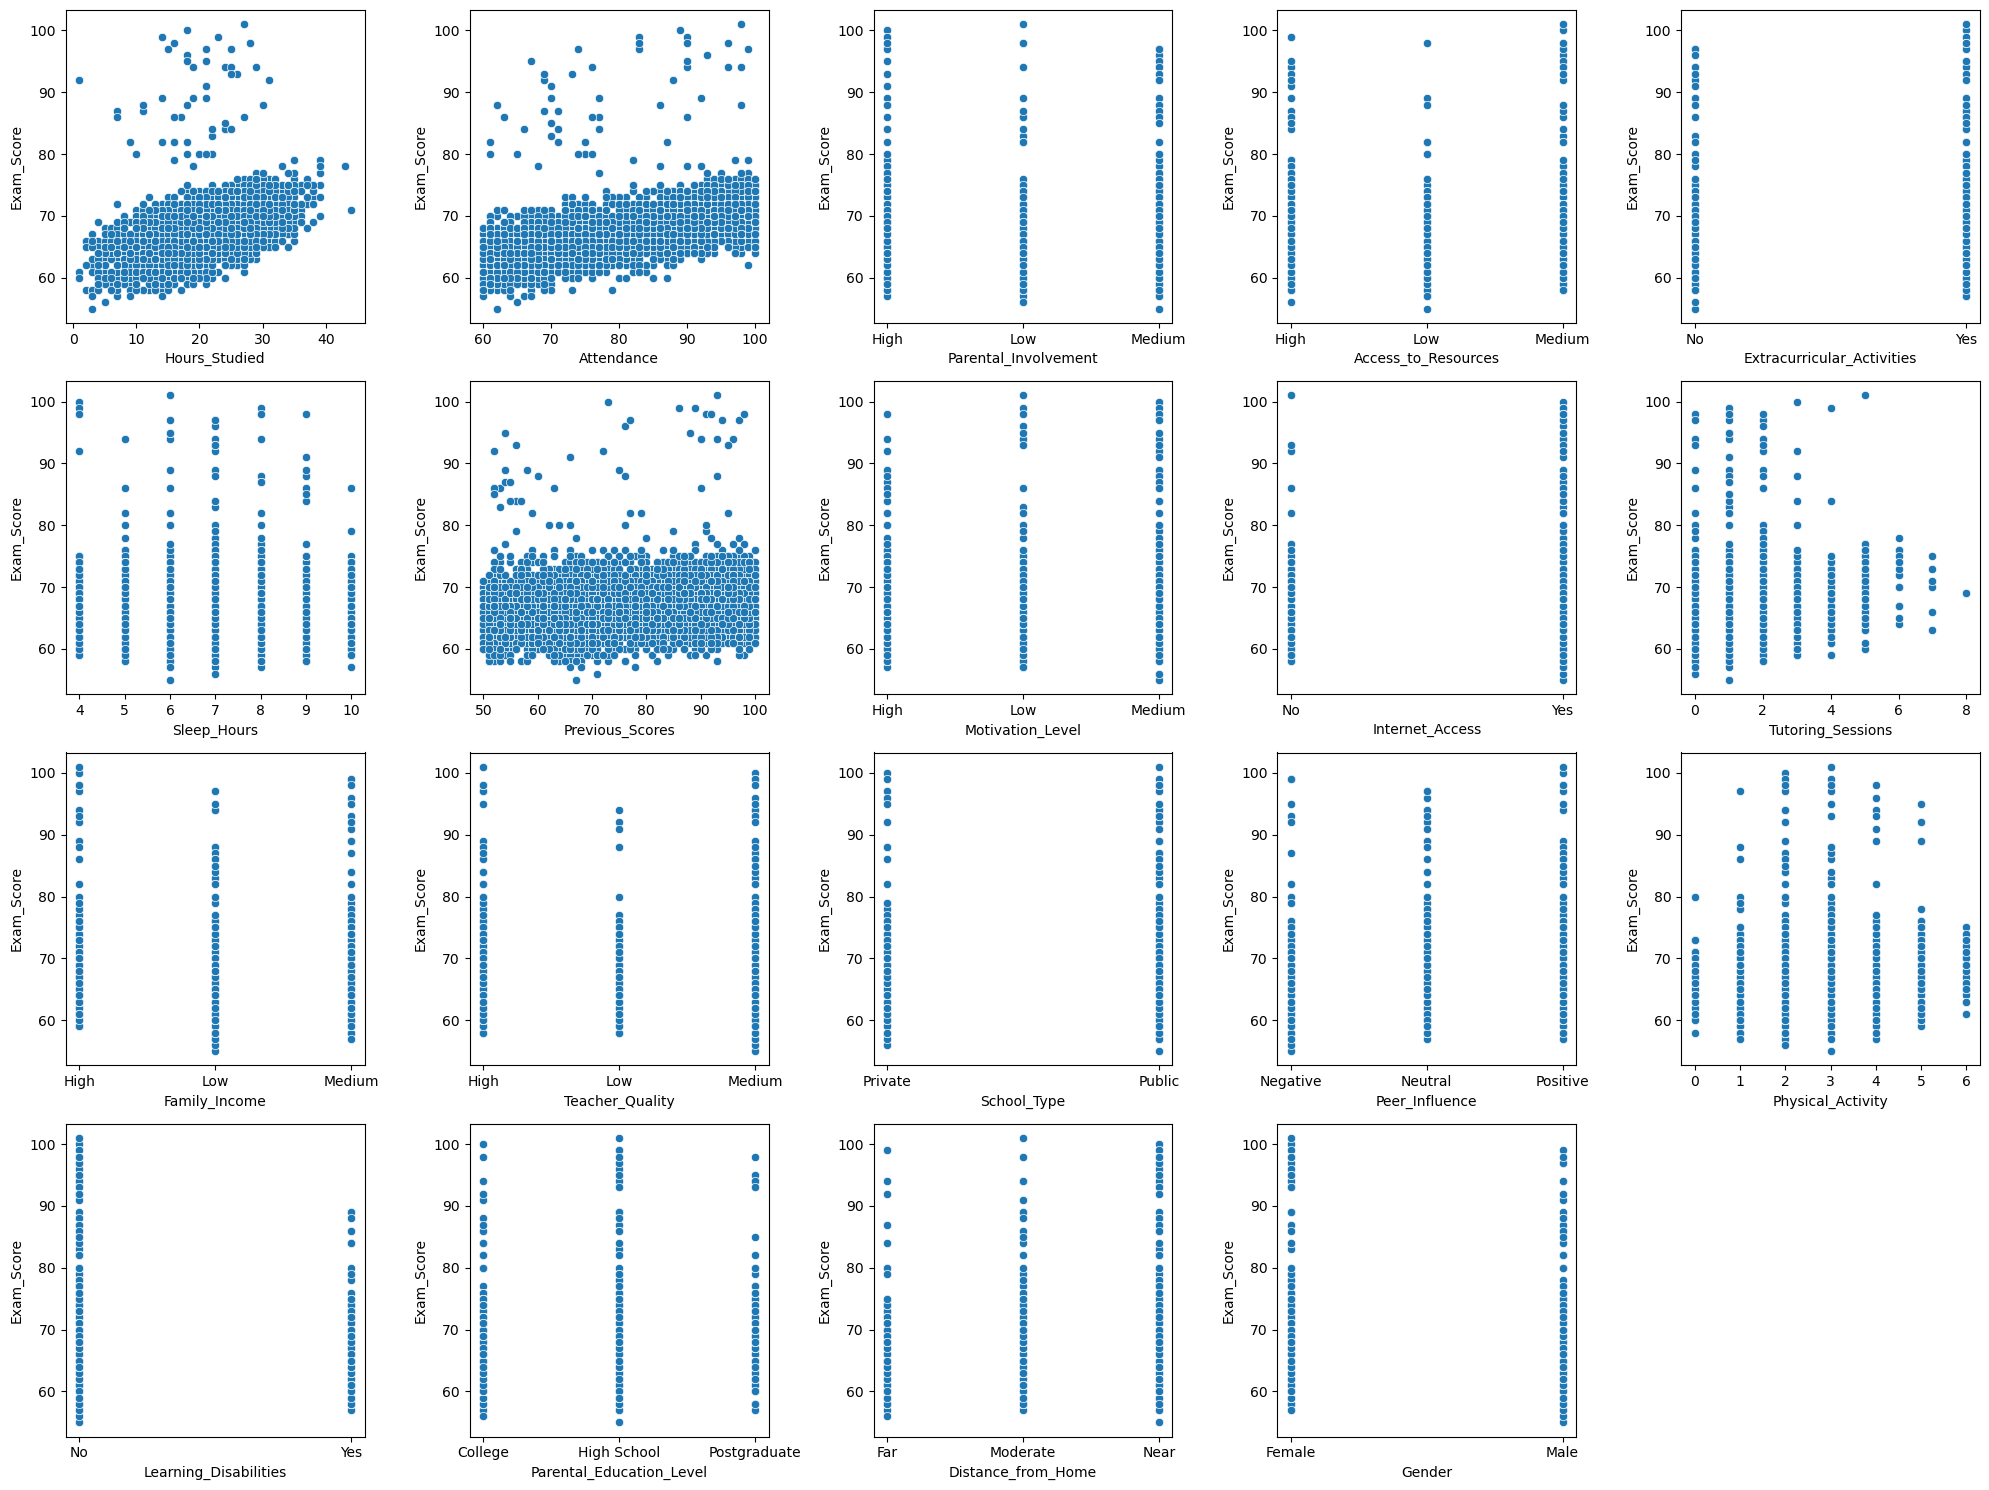

In [118]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 19:
        ax = plt.subplot(4, 5, plotnumber)
        sns.scatterplot(x = data[column] , y = data['Exam_Score'])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

#### First Interesting points

- Clear linear link :
    + Hours_studied,
    + Attendance
- Clear link :
    + Tutoring_Sessions,
    + Sleep_Hours,
    + Physical_Activity,
    + Distance_from_Home
- Noticable link :
    + Parental_Education_Level, 

In [119]:
categorical_columns = data.select_dtypes(include = ['category']).columns

# We use 'LabelEncoder' to transform the categorical variables into numerical values
le = LabelEncoder()
for col in categorical_columns: 
    data[col] = le.fit_transform(data[col])

# high = 0, low = 1, medium = 2 
data.head(15)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2,1,2,3,0,2,2,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2,0,1,2,0,1,1,1,67
7,25,78,1,0,1,6,50,2,1,1,0,0,1,0,2,0,1,0,1,66
8,17,94,2,0,0,6,80,0,1,0,2,1,0,1,1,0,0,2,1,69
9,23,98,2,2,1,8,71,2,1,0,0,0,1,2,5,0,1,1,1,72


We want to see if our variables have some correlation between themselves. As a lot of them are categorical, we will use the **Chi-square** test and the **Cramers' V** test.

The Chi-Square test is a statistical test that help decide if there is a significant association between two categorical variables or not. The treshold value is set up to 0.05 :
- If the score between two variables is **higher than 0.05**, the two variables are **not correlated**.
- If the score between two variables is **lower than 0.05**, the two variables are **correlated**.

C:\Users\louis\AppData\Local\Temp\ipykernel_8224\835534941.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True,


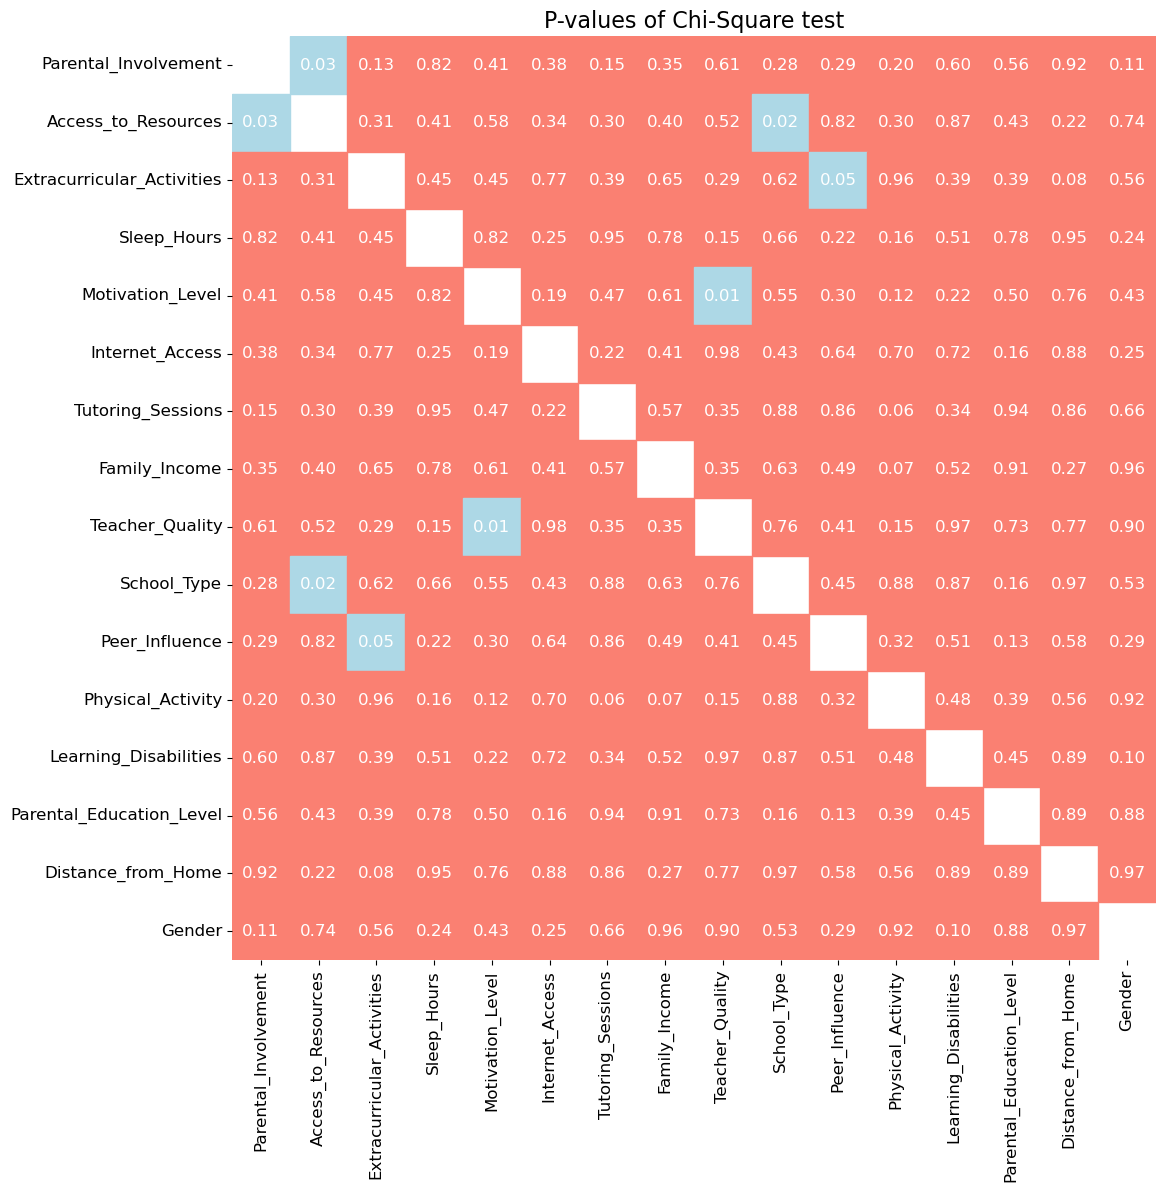

In [120]:
data_cat = data.drop(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score'], axis=1)

def chi_square_test(data_cat):
    cols = data_cat.columns
    p_values = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(data_cat[col1], data_cat[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                p_values.loc[col1, col2] = p
            else:
                p_values.loc[col1, col2] = np.nan

    return p_values

p_values = chi_square_test(data_cat)

def custom_cmap(value):
    return 'lightblue' if value <= 0.05 else 'salmon'

colors = p_values.map(lambda x: custom_cmap(x) if not np.isnan(x) else 'white')

plt.figure(figsize=(16, 12))

sns.heatmap(p_values, annot=True, fmt=".2f", cbar=False, square=True,
            annot_kws={"size": 12, "color": "white"},
            mask=p_values.isnull(), linewidths=0.5,
            cmap=sns.color_palette(['lightblue', 'salmon']))

for y in range(p_values.shape[0]):
    for x in range(p_values.shape[1]):
        if not np.isnan(p_values.iloc[y, x]):
            plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True,
                                              color=colors.iloc[y, x], edgecolor='black', lw=1))

plt.title('P-values of Chi-Square test', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

On the heatmap representing the results of the Chi-Square test, we can see that we have some other correlations than the ones with the Exam_Score. 
We observe correlations between :
- Peer_Influence and Extracurricular_Activities
- School_Type and Access_to_Ressources
- Teacher_Quality and Motivation_Level
- Access_to_Resources and Parental_Involvement

The **Cramers' V test** is another way to show some strong associations between categorical variables. We use this second test to ensure our the results we had with the statistical test Chi-Square.  
We will evaluate the Cramer's V test with a heatmap. The score can go from 0 to 1, where **0 is a weak association**, and **1 is a strong association**.

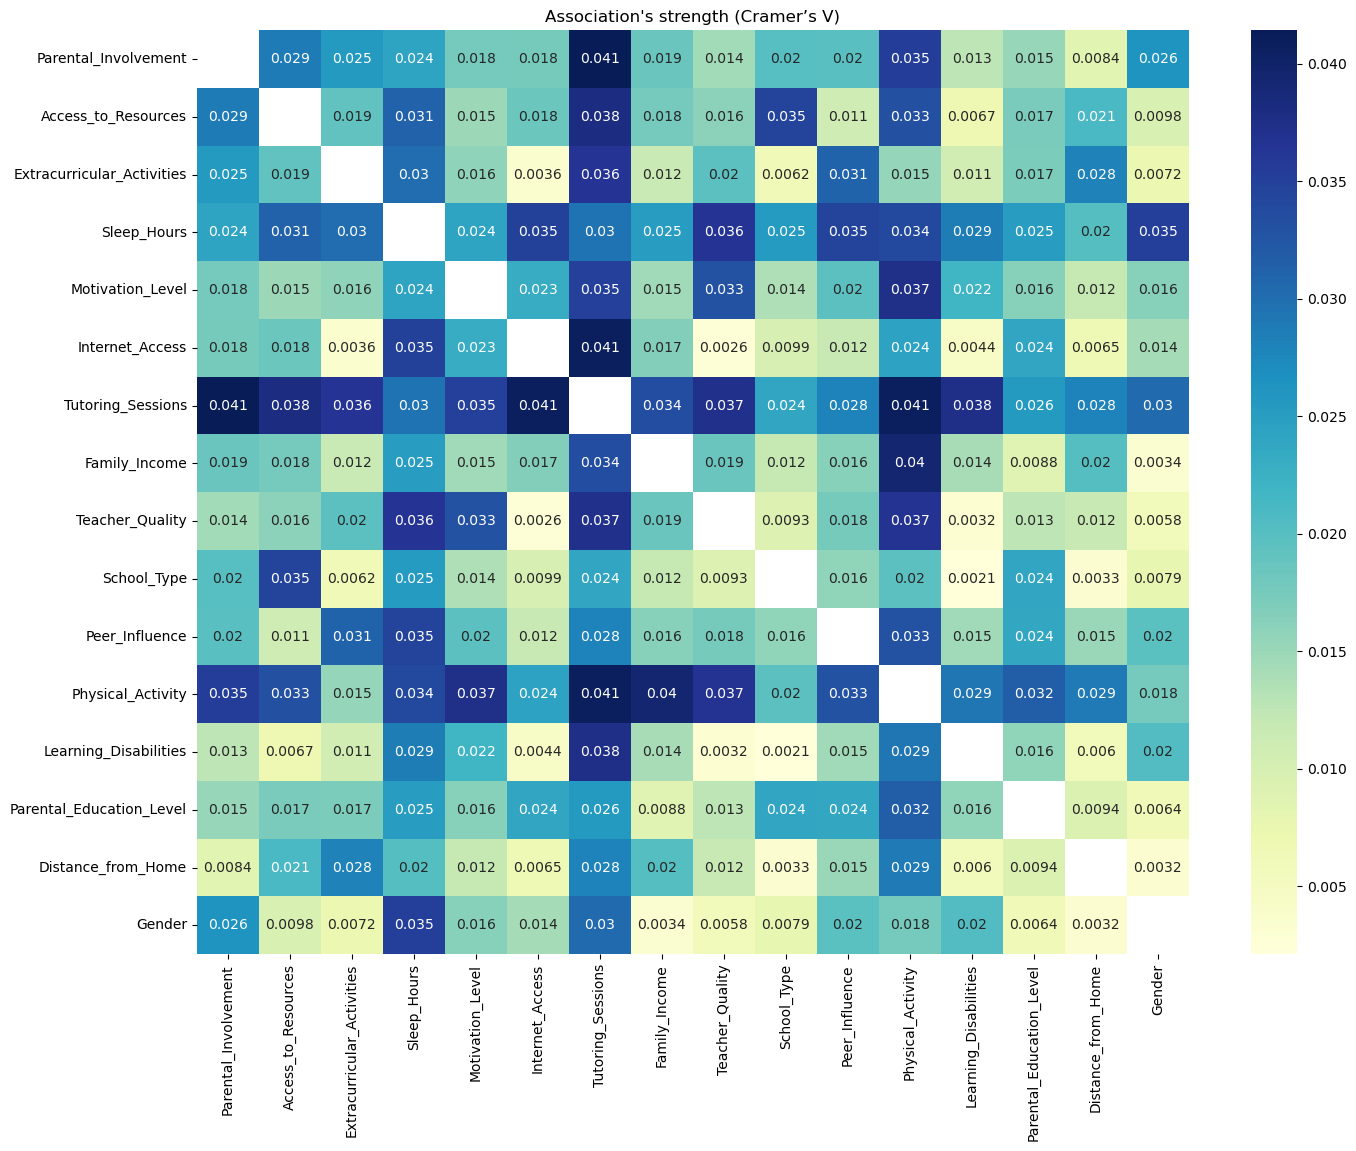

In [121]:
# Calculate the strength of the associations (Cramer's V)
def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

def cramers_v_matrix(data):
    cols = data.columns
    cramers_v_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)

    for col1 in cols:
        for col2 in cols:
            if col1 != col2:
                contingency_table = pd.crosstab(data[col1], data[col2])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                cramers_v_matrix.loc[col1, col2] = cramers_v(chi2, contingency_table.sum().sum(), contingency_table.shape[0], contingency_table.shape[1])
            else:
                cramers_v_matrix.loc[col1, col2] = np.nan

    return cramers_v_matrix

# Calcul du Cramer's V
cramers_v_data = cramers_v_matrix(data_cat)

# Heatmap du Cramer's V
plt.figure(figsize=(16, 12))
sns.heatmap(cramers_v_data, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Association's strength (Cramer’s V)")
plt.show()

Here we see that the Cramer's V values don't go upper than 0.041, which show that none of the variables have a strong association with another one.

**Conclusions**:
If the Chi-Square test show some correlations between variables, it is not he case with the Cramer's V test. It means that some of the relation are statistically significant, but the effect of these relations is very weak. The results of teh Chi-Square test could also be caused by the large size of the dataset. With a bit dataset, even some weak association can seam satistically significant.  

We can assume for the rest of the study, that our dataset **does not show any relevant correlation** between variables other than the Exam_Score.

## Modeling

### Multiple Linear Regression

In [122]:
# Separating features (X) and target (y)
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 5.215195379547096
R-squared (R2): 0.6643872636734858


A R-squared value of 0.664 indicates that 66.4% of the variance in exam scores is explained by the features.

### Visualization

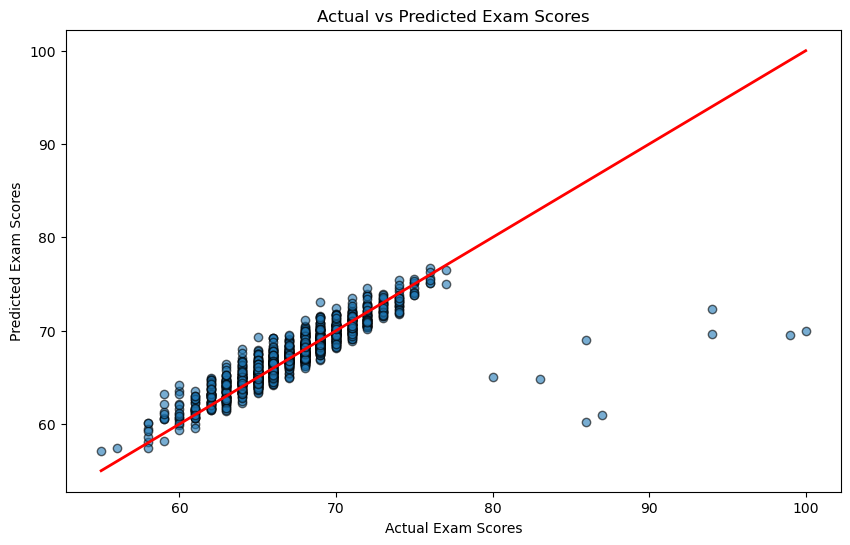

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

This scatter plot compares actual exam scores against predicted exam scores. Points close to the red line indicate accurate predictions. 
Most predictions align closely with actual scores. However, there are visible outliers, especially for higher exam scores.

### Printing the coefficients 

In [124]:
linear_coefficients = model.coef_
feature_names = X.columns  
coef_df = pd.DataFrame(linear_coefficients, index=feature_names, columns=["Coefficient"])
print(coef_df)

                            Coefficient
Hours_Studied                  1.750944
Attendance                     2.282282
Parental_Involvement          -0.352489
Access_to_Resources           -0.351082
Extracurricular_Activities     0.265340
Sleep_Hours                   -0.034221
Previous_Scores                0.681564
Motivation_Level              -0.139891
Internet_Access                0.241076
Tutoring_Sessions              0.594184
Family_Income                 -0.120288
Teacher_Quality               -0.233452
School_Type                    0.003859
Peer_Influence                 0.389515
Physical_Activity              0.185848
Learning_Disabilities         -0.263925
Parental_Education_Level       0.119278
Distance_from_Home             0.322005
Gender                        -0.010151


### Visualizing the coefficients

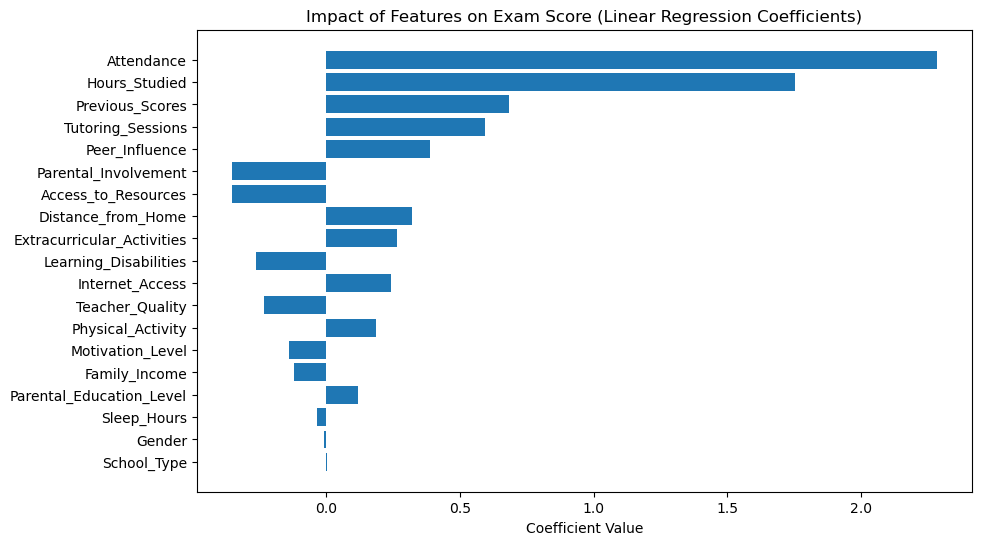

In [125]:
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linear_coefficients
})
coeff_df = coeff_df.reindex(coeff_df['Coefficient'].abs().sort_values(ascending=True).index)
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Impact of Features on Exam Score (Linear Regression Coefficients)")
plt.show()

### Key Inferences:

##### Attendance:
Coefficient: 2.28 - Regular attendance has the strongest positive impact on exam scores

##### Hours_Studied:
Coefficient: 1.75 - Students who study more hours tend to score higher on exams.

##### Parental_Involvement:
Coefficient: -0.35 - Surprisingly, higher parental involvement correlates negatively with exam scores. 

##### Access_to_Resources:
Coefficient: -0.35 - Similar to parental involvement, greater resource availability could reflect over-reliance or inefficient usage.

### Ordinary Least Squares (OLS) Method

This step fits a regression model using the OLS method. OLS minimizes the sum of squared residuals to estimate coefficients.

In [126]:
y = data['Exam_Score']
terms = data.columns.drop('Exam_Score')
terms

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')

In [127]:
X = MS(terms).fit_transform(data)
model_all = sm.OLS(y,X).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     612.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:29:31   Log-Likelihood:                -14436.
No. Observations:                6378   AIC:                         2.891e+04
Df Residuals:                    6358   BIC:                         2.905e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     39.9598      0.371    107.680      0.000      39.232      40.687
Hours_Studied                  0.2917      0.005     59.759      0.000       0.282       0.301
Attendance                     0.1976      0.003     78.081      0.000       0.193       0.203
Parental_Involvement          -0.4305      0.034    -12.750      0.000      -0.497      -0.364
Access_to_Resources           -0.4031      0.034    -12.006      0.000      -0.469      -0.337
Extracurricular_Activities     0.5444      0.060      9.144      0.000       0.428       0.661
Sleep_Hours                   -0.0103      0.020     -0.519      0.604      -0.049       0.029
Previous_Scores                0.0480      0.002     23.628      0.000       0.044       0.052
Motivation_Level              -0.1553      0.037     -4.162      0.000      -0.228      -0.082
Internet_Access                0.9411      0.110      8.539      0.000       0.725       1.157
Tutoring_Sessions              0.4927      0.024     20.817      0.000       0.446       0.539
Family_Income                 -0.1566      0.039     -3.977      0.000      -0.234      -0.079
Teacher_Quality               -0.2314      0.032     -7.123      0.000      -0.295      -0.168
School_Type                   -0.0021      0.063     -0.032      0.974      -0.126       0.122
Peer_Influence                 0.5347      0.039     13.843      0.000       0.459       0.610
Physical_Activity              0.1654      0.028      5.818      0.000       0.110       0.221
Learning_Disabilities         -0.8673      0.095     -9.091      0.000      -1.054      -0.680
Parental_Education_Level       0.1608      0.042      3.867      0.000       0.079       0.242
Distance_from_Home             0.4918      0.044     11.286      0.000       0.406       0.577
Gender                        -0.0339      0.059     -0.573      0.567      -0.150       0.082
==============================================================================
Omnibus:                     8761.989   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2036474.981
Skew:                           8.027   Prob(JB):                         0.00
Kurtosis:                      89.054   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### !!!! This is the version of OLS where the data is standardized, but when I check the summary, the column names don't show up 
I tried fixing it but nothing works - maybe you can come up with a solution 

In [128]:
y = data['Exam_Score']
X = data.drop(columns=['Exam_Score'])

# Standardize the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_with_intercept = sm.add_constant(X_scaled)
model_all = sm.OLS(y, X_with_intercept).fit()
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     612.2
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:29:32   Log-Likelihood:                -14436.
No. Observations:                6378   AIC:                         2.891e+04
Df Residuals:                    6358   BIC:                         2.905e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2521      0.029   2304.654      0.0

R-squared: 0.647 is similar to LinearRegression -  indicating the model explains 64.7% of score variance

### Shrinkage Methods - Ridge and Lasso

We just saw how to use the Multiple Linear Regression model to have a first idea of which factors influence the most the final exam score of a student. We will now use two shrinkage methods, **Ridge** and **Lasso**, to confirm our inference observation. 

Multiple Linear Regression presents some risks of overfitting and can be unstable if the model presents some multicolinearity. Shrinkage methods, compared to Linear Regression, have the benefit of **being more reliable** and make a **better selection of relevant variables.** The penalisation added with Ridge and Lasso can help **against the risk of overfitting**. 

#### Ridge Method

Ridge is a shrinkage method using the **L2 norm** to shrink the coefficients. This way, the L2 norm **reduces the impact of multicolinearity**. Shrinking the coefficients also have an impact on their stability : it limits their amplitude. It hence helps **reducing the overfitting's risk**.  
We saw earlier with Chi-Square and Cramer's V that our dataset does not contain much colinearity. We will try to confirm this information by comparing the results of Ridge to those of the Linear Regression and of Lasso and Random Forest later. 

The **alpha parameter** is very important to have a good evalution model.
Below, we are testing different alpha values using **GridSearchCV**. We use the GridSearchCV method to find the best value for the hyperparameter alpha. This method helped us tuning the model correctly by using cross validation for all given alpha values.

In [129]:
# Define the features and the target (Exam_Score)
X = data.drop(columns=['Exam_Score'])  # Toutes les colonnes sauf Exam_Score
y = data['Exam_Score']

# Conversion to categorical variables if necessary
X = pd.get_dummies(X, drop_first=True)

# Separating Training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Best alpha for Ridge
ridge_model = Ridge()
ridge_cv = GridSearchCV(ridge_model, param_grid, cv=7, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
print(f"Best alpha for Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Best CV MSE for Ridge: {-ridge_cv.best_score_:.4f}")

Best alpha for Ridge: 10
Best CV MSE for Ridge: 5.5198


The GridSearchCV shows that the best value for the Ridge **hyperparameter alpha is 10**.  
Let **apply the Ridge model** to our dataset with an alpha value of 10.

                       Feature  Coefficient
8              Internet_Access     0.883893
15       Learning_Disabilities    -0.844111
4   Extracurricular_Activities     0.536613
13              Peer_Influence     0.513352
9            Tutoring_Sessions     0.480921
17          Distance_from_Home     0.478211
2         Parental_Involvement    -0.406183
3          Access_to_Resources    -0.402088
0                Hours_Studied     0.292548
11             Teacher_Quality    -0.259166
1                   Attendance     0.197603
14           Physical_Activity     0.180043
7             Motivation_Level    -0.177932
16    Parental_Education_Level     0.169228
10               Family_Income    -0.161275
6              Previous_Scores     0.047330
5                  Sleep_Hours    -0.023312
18                      Gender    -0.019939
12                 School_Type     0.008507


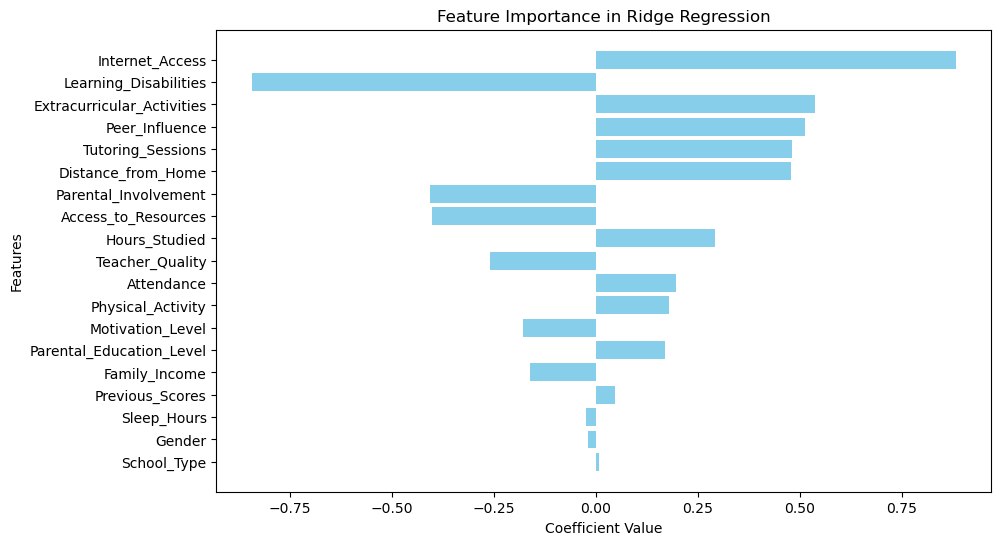

In [130]:
# Create the Ridge Model
ridge_model = Ridge(alpha=10)

# Train the Model
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Obtenir les coefficients du modèle
coefficients = ridge_model.coef_

# Associer les coefficients aux noms des colonnes
coeff_data = pd.DataFrame({
    'Feature': X.columns,   # Noms des colonnes
    'Coefficient': coefficients
})

# Trier les coefficients par ordre décroissant d'importance absolue
coeff_data['Absolute_Coefficient'] = coeff_data['Coefficient'].abs()
coeff_data = coeff_data.sort_values(by='Absolute_Coefficient', ascending=False)

# Afficher les résultats
print(coeff_data[['Feature', 'Coefficient']])

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coeff_data['Feature'], coeff_data['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression')
plt.gca().invert_yaxis()  # Inverser l'axe pour afficher les plus importants en haut
plt.show()

In [131]:
# Evaluate performances through Mean Squared Error (MSE) and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error (MSE): 5.216237376034183
Coefficient of Determination (R^2): 0.6643202082197927


Regarding the MSE error and the R² score, we can say that **the error of the model is acceptable**. However, the results showed by the Ridge model are **really different** from the ones of the Multiple Linear Regression. The reason may be that Ridge is trying to reduce some multiccolinearity that does not really exist in our dataset. This way, the algorithm may **increase some really weak signals** that are not significant in reality. It explains the big difference we can observe in the results.  
This shows that **Ridge is probably not the best Machine Learning algorithm to use in this situation**.  

#### Lasso Method

The **Lasso Method** is a shrinkage method like Ridge, but it uses **the norm L1** to shrink the coefficient. The use of this norm allows Lasso to **select some variables and put to zero the ones** that don't have any important impact on the Exam_Score.  
Compared to Ridge, the Lasso method does not try to reduce the impact of multicolinearity, it will only select the variables that have the most impact on the Exam_Score.  
In the context of our inference question, the results given by Lasso should be interesting.

In [132]:
# Define the target and the predictors
X = data.drop(columns=['Exam_Score']) 
y = data['Exam_Score']

X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We test different values of the alpha parameter to find the best one using **GridSearchCV**, the same way we did for Ridge. 

In [133]:
# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Best alpha for Lasso
lasso_model = Lasso()
lasso_cv = GridSearchCV(lasso_model, param_grid, cv=7, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
print(f"Best alpha for Lasso: {lasso_cv.best_params_['alpha']}")
print(f"Best CV MSE for Lasso: {-lasso_cv.best_score_:.4f}")

Best alpha for Lasso: 0.01
Best CV MSE for Lasso: 5.5183


According to the results of the GridSearchCV, we will chose **a value of 0.01** to train the dataset with the lasso algorithm.

                       Feature  Coefficient
0                Hours_Studied     1.745855
1                   Attendance     2.273285
2         Parental_Involvement    -0.341660
3          Access_to_Resources    -0.341391
4   Extracurricular_Activities     0.255080
5                  Sleep_Hours    -0.024476
6              Previous_Scores     0.672689
7             Motivation_Level    -0.128709
8              Internet_Access     0.228283
9            Tutoring_Sessions     0.583715
10               Family_Income    -0.110370
11             Teacher_Quality    -0.223888
13              Peer_Influence     0.379774
14           Physical_Activity     0.174914
15       Learning_Disabilities    -0.254234
16    Parental_Education_Level     0.109642
17          Distance_from_Home     0.311663


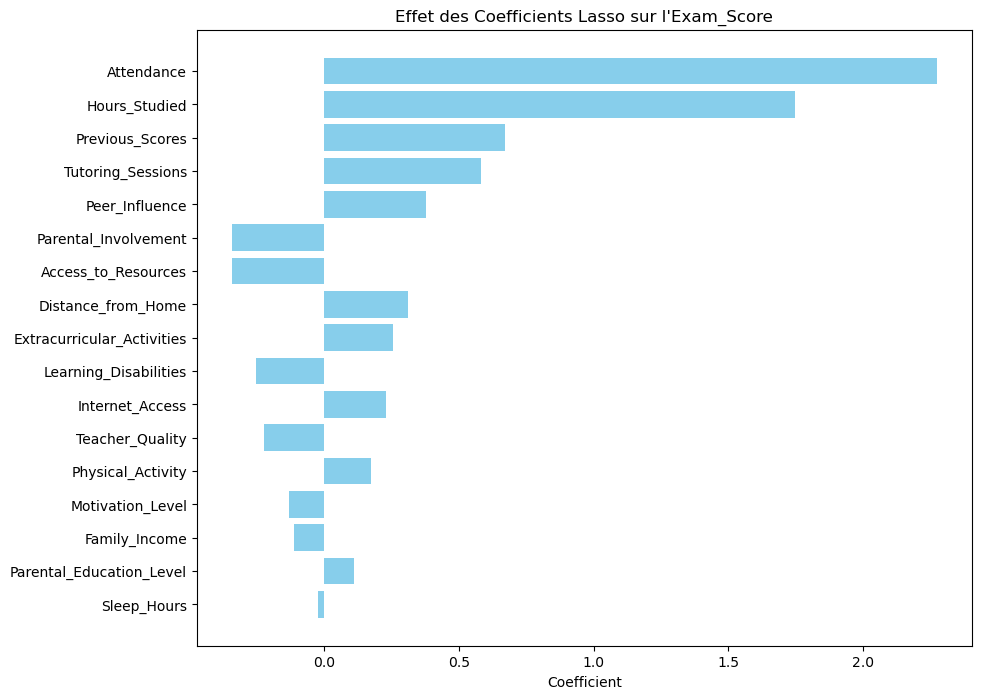

In [134]:
# Initialize lasso with alpha value
lasso = Lasso(alpha=0.01)

# train
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Keeping only the variables with a non-zero coefficient
lasso_coefficients = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]
print(lasso_coefficients)

lasso_coefficients_sorted = lasso_coefficients.reindex(
    lasso_coefficients['Coefficient'].abs().sort_values(ascending=False).index
)

plt.figure(figsize=(10, 8))
plt.barh(lasso_coefficients_sorted['Feature'], lasso_coefficients_sorted['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title("Effet des Coefficients Lasso sur l'Exam_Score")
plt.gca().invert_yaxis()  # Inverser l'axe des y pour avoir les plus grands en haut
plt.show()

In [135]:
# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Show R² score
r2_score = lasso.score(X_test, y_test)
print("R^2 Score:", r2_score)


Mean Squared Error: 5.215963046846375
R^2 Score: 0.6643378620875146


The results of the Lasso Method are similar to the results of the Multiple Linear Regression. The Mean Squared Error and the R² Score evaluating Lasso performance are in the same range than those evaluating Ridge. We can say that a MSE of 5,21 and aR² Score of 0.66 are acceptable and that **the results are reliable**. 

We can then deduce several things from the results we have now :
- Lasso **shrinked toward zero only 2 variables : Shool Type and Gender**. All the other have an importance, even small, on the prediction of the Exam_Score.
- **Lasso is highly similar to Linear Regression**, but **very different from Ridge**. It indicates the lack of multicolinearity of our dataset and prove that using Lasso and MLR to produce some inference conclusions is a good choice. Lasso and MLR are **ignoring some very small multicolinearity signals that Ridge is amplifying**.

### Random Forest method

Our primary objective is to demonstrate inference—understanding the relationships between features and the target variable. After exploring **Linear Regression** and **Lasso Regression**, we observed the following:

- **Linear Regression** provides clear coefficients that indicate the direct influence of each feature on the target. However, it is limited to modeling linear relationships and fails to capture interactions or non-linear patterns.

- **Lasso Regression** improves upon Linear Regression by adding regularization, which aids in feature selection by shrinking less relevant coefficients to zero. However, it shares the linearity assumption and may not fully explain more complex data dynamics.



To enhance our ability to infer relationships, we introduce **Random Forest Regressor** as it offers several advantages for inference:

- **Capturing Non-Linear Relationships:** Random Forest models non-linear dependencies and complex interactions between features and the target variable, providing deeper insights into the data's structure.

- **Feature Importance Analysis:** Random Forest inherently calculates feature importance, ranking variables based on their contribution to the model. This helps identify the most influential predictors.

- **Interpretability Through Aggregation:** Although Random Forest is an ensemble method, it can still offer interpretable outputs, such as variable importance measures, while leveraging its robust predictive power.

- **Robustness for Generalization:** By averaging predictions across multiple trees, Random Forest avoids overfitting and ensures that inference is not biased by noise or outliers in the dataset.

By incorporating Random Forest, we aim to complement the insights gained from Linear and Lasso Regression with a method capable of revealing deeper, non-linear relationships and complex feature interactions while maintaining robustness.

#### Focus on inference : Basic Random Forest model

We initialize a Random Forest Regressor with default parameters.

The Random Forest is an ensemble model that builds multiple decision trees and aggregates their predictions for better accuracy.
Here, the random_state=42 ensures reproducibility.

Then we use the trained model to predict the target values on the test set.
Evaluation metrics:

- Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
- R² Score: Indicates how well the model explains the variance in the target variable.

In [136]:
from sklearn.metrics import mean_squared_error, r2_score
# Create and train a baseline Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate the baseline model
y_pred = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 5.927580407523511
R2 Score: 0.6185432499487367


- MSE: 5.93 (or RMSE: 2.43): On average, the Random Forest model predictions are off by about 2.43 points on a scale of 0 to 100, which is a reasonable error.
- R² Score: 0.62: The model explains 62% of the variance in the student scores.

Now, let's look at the **feature importance**, that helps us understand which variables have the most significant impact on predictions.

- We extract the feature_importances_ attribute from the model.
- The results are sorted and visualized for better interpretability.

                       Feature  Importance
1                   Attendance    0.380598
0                Hours_Studied    0.247461
6              Previous_Scores    0.091427
9            Tutoring_Sessions    0.036596
14           Physical_Activity    0.028039
3          Access_to_Resources    0.027859
5                  Sleep_Hours    0.026946
2         Parental_Involvement    0.024754
10               Family_Income    0.021084
13              Peer_Influence    0.017840
16    Parental_Education_Level    0.015766
17          Distance_from_Home    0.014682
11             Teacher_Quality    0.013856
7             Motivation_Level    0.012126
15       Learning_Disabilities    0.011472
4   Extracurricular_Activities    0.008614
18                      Gender    0.007216
8              Internet_Access    0.006918
12                 School_Type    0.006747


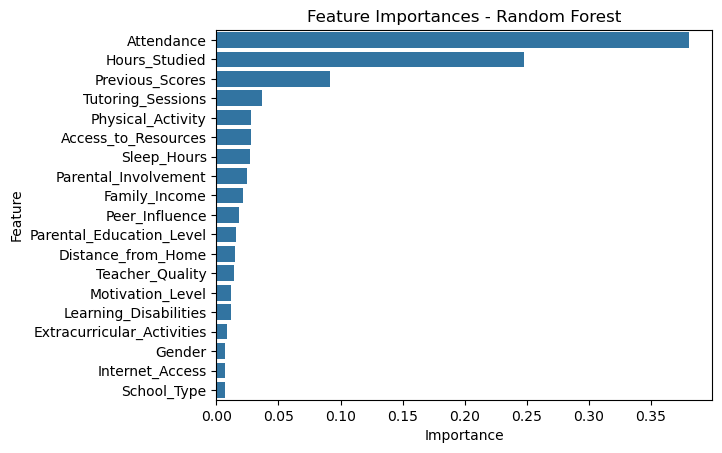

In [137]:
# Analyze feature importance 
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values(by='Importance', ascending=False)
print(feature_importances)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances - Random Forest')
plt.show()

Here we can see that the two features that have the biggest importance are still :
1) **Attendance**
2) **Hours studied**

Now that we have looked at the inference relations, which were our first goal, let's try to improve the **performance** of our model.

#### Focus on precision

Random Forest has several hyperparameters that influence its performance, such as:
- n_estimators: Number of trees in the forest.
- max_depth: Maximum depth of each tree.
- min_samples_split: Minimum number of samples required to split a node.
- min_samples_leaf: Minimum number of samples required in a leaf node.

We first use **GridSearchCV** to search for the **best combination** of these parameters using cross-validation. Cross-validation ensures the model's performance is tested on multiple subsets of the training data.

In [138]:
# Optimize hyperparameters with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples in a leaf
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available CPU cores
    verbose=2,          # Log the process details
    scoring='r2'        # Optimize for R² score
)

# Train the model with GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and optimized model
print("\nBest Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Now we use the optimized model to make predictions on the test set.

The evaluation metrics (MSE, R²) are recalculated to compare with the baseline model's performance.


In [139]:
# Make predictions and evaluate the optimized model
y_pred_optimized = best_rf.predict(X_test)
print("\nOptimized Model Evaluation:")
print(f"Optimized Mean Squared Error: {mean_squared_error(y_test, y_pred_optimized)}")
print(f"Optimized R2 Score: {r2_score(y_test, y_pred_optimized)}")


Optimized Model Evaluation:
Optimized Mean Squared Error: 5.572262946890805
Optimized R2 Score: 0.6414089446253353


Both the MSE and the R² Score are better than with the basic Random Forest

Now let's perform **Cross-validation** for a **more robust evaluation** by splitting the training data into multiple subsets.

- The model is trained and validated on different subsets, and the average score is computed.
- This reduces the risk of overfitting to a single train-test split.

In [140]:
# Perform cross-validation for robust evaluation
cross_val_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("\nCross-Validation R2 Scores:", cross_val_scores)
print("Mean Cross-Validated R2 Score:", cross_val_scores.mean())


Cross-Validation R2 Scores: [0.58164816 0.66681811 0.64232762 0.58508032 0.6591869 ]
Mean Cross-Validated R2 Score: 0.6270122214628275


- Cross-Validation Scores (ranging from 58.2% to 66.7%): The consistency across folds indicates that the model is stable and does not suffer from high variance.
- Mean Cross-Validation R² Score of 0.627: The model explains about 62.7% of the variance in the target variable on average, which is a reasonable performance.

## Conclusion

Below is a test to combine all our graphs together, but we will perhaps need to standardize the coefficients before

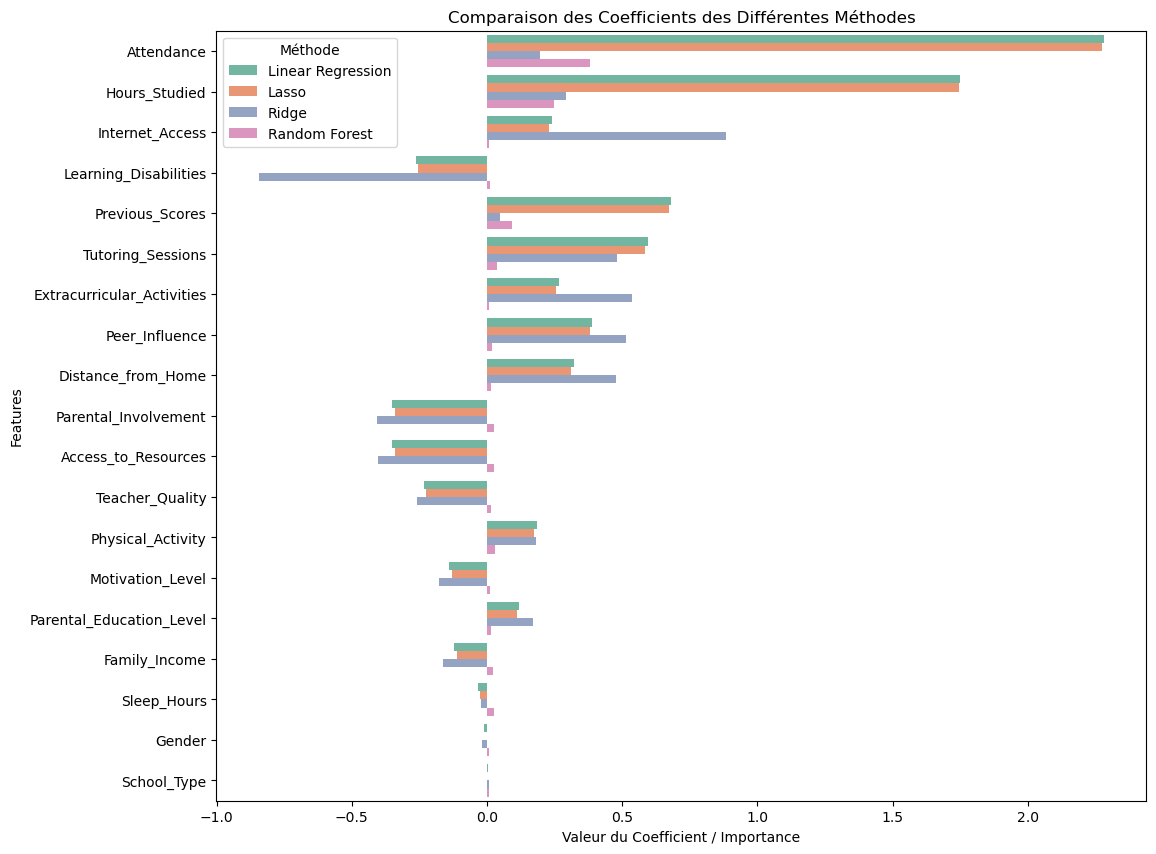

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simuler les données (vous pouvez adapter en fonction de vos résultats)
linear_coeff = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_coefficients})
ridge_coeff = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
lasso_coeff = pd.DataFrame({'Feature': lasso_coefficients_sorted['Feature'], 'Coefficient': lasso_coefficients_sorted['Coefficient']})
rf_importances = pd.DataFrame({'Feature': X.columns, 'Coefficient': rf.feature_importances_})

# Ajouter une colonne pour distinguer les méthodes
linear_coeff['Method'] = 'Linear Regression'
ridge_coeff['Method'] = 'Ridge'
lasso_coeff['Method'] = 'Lasso'
rf_importances['Method'] = 'Random Forest'

# Concaténer les DataFrames
combined_df = pd.concat([linear_coeff, ridge_coeff, lasso_coeff, rf_importances])

# Trier par importance absolue pour la lisibilité
combined_df['Absolute_Coefficient'] = combined_df['Coefficient'].abs()
combined_df = combined_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Visualisation
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Coefficient', y='Feature', hue='Method', data=combined_df, palette='Set2'
)
plt.title('Comparaison des Coefficients des Différentes Méthodes')
plt.xlabel('Valeur du Coefficient / Importance')
plt.ylabel('Features')
plt.legend(title='Méthode')
plt.show()
